<a href="https://colab.research.google.com/github/Joaovtmendes/Dnc-engineer/blob/main/M%C3%A9tricas_na_pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the Data

In [2]:
df_abt = pd.read_excel('churn_data.xlsx')
df_abt.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_abt["TotalCharges"] = pd.to_numeric(df_abt["TotalCharges"],errors='coerce')

In [4]:
df_abt = df_abt.dropna()

In [5]:
df_abt.dtypes

,0
customerID,object
tenure,int64
PhoneService,object
Contract,object
PaperlessBilling,object
PaymentMethod,object
MonthlyCharges,float64
TotalCharges,float64
Churn,object


# Train-Test Split

In [6]:
cat_vars = ['PhoneService',"Contract","PaperlessBilling","PaymentMethod"]
num_vars = ["tenure","MonthlyCharges","TotalCharges"]
modeling_vars = cat_vars + num_vars

In [7]:
X = df_abt.filter(modeling_vars).copy()
y = df_abt['Churn'].copy()
y = pd.DataFrame(y)

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

In [9]:
X = pd.get_dummies(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Feature Engineering

In [11]:
X_train

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
770,11,20.45,237.30,False,True,True,False,False,False,True,False,True,False,False
4161,2,49.95,107.10,False,True,True,False,False,True,False,False,False,False,True
1301,66,58.20,3810.80,False,True,False,False,True,False,True,False,True,False,False
3409,70,113.65,7714.65,False,True,False,False,True,False,True,False,False,True,False
417,40,24.80,1024.70,False,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5513,67,92.45,6140.85,False,True,False,False,True,False,True,True,False,False,False
1809,32,85.00,2642.05,False,True,True,False,False,False,True,False,False,True,False
3873,51,34.20,1782.00,True,False,False,False,True,True,False,True,False,False,False
2991,37,90.00,3371.75,False,True,True,False,False,True,False,False,False,True,False


In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
lr.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [14]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
303,68,60.30,4109.00,True,False,False,False,True,True,False,False,True,False,False,0,0
3690,24,54.15,1240.25,True,False,True,False,False,False,True,False,True,False,False,1,0
706,65,59.60,3739.80,False,True,False,False,True,False,True,False,False,False,True,0,0
1006,18,90.10,1612.75,False,True,True,False,False,False,True,False,False,True,False,1,1
1525,7,20.65,158.95,False,True,True,False,False,True,False,False,False,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,50,94.40,4914.90,False,True,True,False,False,False,True,False,True,False,False,0,0
3172,25,95.90,2448.75,False,True,True,False,False,False,True,False,False,True,False,1,1
6616,43,101.40,4528.00,False,True,True,False,False,False,True,False,False,True,False,1,1
243,65,94.40,6126.15,False,True,True,False,False,True,False,False,False,True,False,0,0


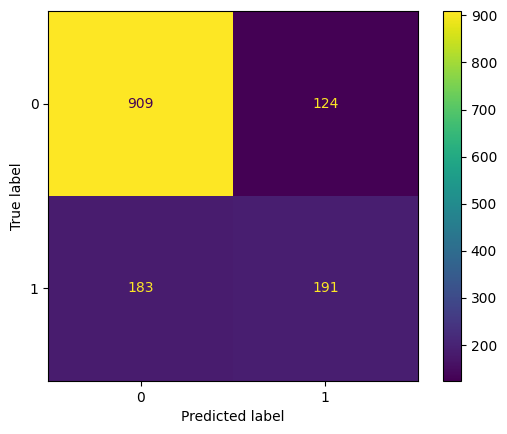

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format='d');

In [17]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.7976529160739687
Acurácia (Teste): 0.7818052594171997
Acurácia Balanceada (Treino): 0.711780043432091
Acurácia Balanceada (Teste): 0.6953282324986669
Precision (Treino): 0.6459525756336877
Precision (Teste): 0.6063492063492063
Recall (Treino): 0.5284280936454849
Recall (Teste): 0.5106951871657754
F1-Score (Treino): 0.5813097866077999
F1-Score (Teste): 0.5544267053701016
ROCAUC (Treino): 0.8371964026370294
ROCAUC (Teste): 0.8286828768293377


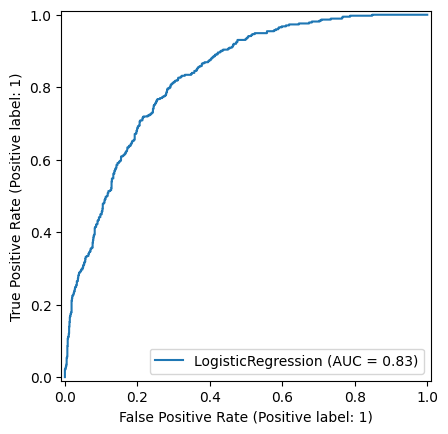

In [19]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, X_test, y_test);

In [20]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.797653,0.711780,0.645953,0.528428,0.581310,0.837196
1,Logistic Regression,teste,0.781805,0.695328,0.606349,0.510695,0.554427,0.828683
